# 1. 통계적 추정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%precision 3

'%.3f'

In [3]:
df = pd.read_csv('data/ch4_scores400.csv')
df

,score
0,76
1,55
2,80
3,80
4,74
...,...
395,77
396,60
397,83
398,80


=> 20명의 데이터로 전교생 400명의 평균 점수, 모분산 추정

69.53 206.6691


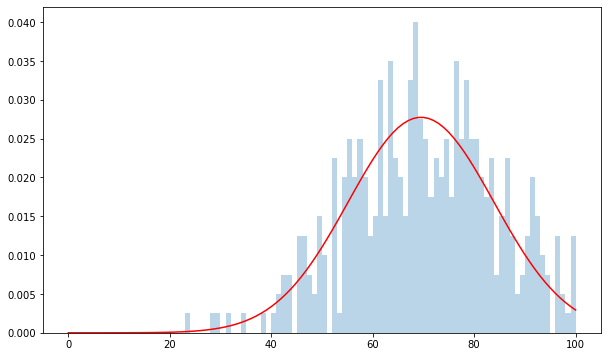

In [4]:
# 먼저 모집단 파악
scores = np.array(df['score'])
# 모평균, 모분산
p_mean = np.mean(scores)
p_var = np.var(scores)
print(p_mean, p_var)

# 그래프 출력
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
xs = np.arange(101)

rv = stats.norm(p_mean, np.sqrt(p_var))
ax.plot(xs, rv.pdf(xs), color = 'red')
ax.hist(scores, bins = 100, range=(0, 100), density = True, alpha = 0.3)
plt.show()

=> 정규분포와 가까운 특징을 지닌 분포

In [5]:
# 표본데이터 20개 뽑기
np.random.seed(0)
n = 20
sample = np.random.choice(scores, n)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [6]:
# 표본크기가 20인 표본데이터 1만개 추출
np.random.seed(1111)
n_samples = 10000
samples = np.random.choice(scores, (n_samples, n))

## 1-1. 점추정
- 모평균이나 모분산 등의 모수를 하나의 수치로 추정
- 추정량의 기댓값이 추측하려는 모수가 되는 성질을 불편성이라고 하며 불편성을 가진 추정량을 불편추정량이라고 한다.
- 표본평균이 모평균을 잘 추정할 수 있는 근거 중 하나가 바로 이 불편성이다.
- 표본크기 n을 증가시키면 추측하기 원하는 모수에 수렴해가는 성질을 일치성이라고 하며 일치성을 지닌 추정량을 일치추정량이라고 함
- 표본평균은 불편성과 일치성을 모두 가지고 있기 때문에 모평균을 잘 추정한다고 말할 수 있다.

- 불편성 : 기댓값이 추측하기 원하는 모수가 되는 성질
- 일치성 : 표본 크기를 키우면 추측하기 원하는 모수에 수렴하는 성질

#### 과제 0905_1
- p.266-291 예제 코드 풀기

In [7]:
print('모평균:', df.score.mean())
print('모분산:', df.score.var())

# 표본크기가 20개인 데이터 1만개 추출
np.random.seed(1111)
n = 20
n_samples = 10000
samples = np.random.choice(scores, (n_samples, n))

# 표본평균의 평균
sample_means = np.mean(samples, axis=1)

# 표본평균의 불편분산
sample_u_vars = np.var(samples, axis = 1, ddof = 1)
print('표본평균, 분산:', np.mean(sample_means), np.mean(sample_u_vars))
for i in range(5):
    s_mean = np.mean(samples[i])
    print(f'{i+1}번째 표본평균: {s_mean: .3f}')

모평균: 69.53
모분산: 207.1870676691731
표본평균, 분산: 69.53799999999998 206.67808263157895
1번째 표본평균:  67.000
2번째 표본평균:  72.850
3번째 표본평균:  69.200
4번째 표본평균:  64.450
5번째 표본평균:  72.650


- 모분산의 평균과 비슷 (추정량의 기댓값이 추측하려는 모수가 되는 성질 : 불편성)
- 불편성을 가진 추정량 : 불편추정량

   (대수의 법칙 활용)
- 표본 크기 n을 증가시키면 추측하기 원하는 모수에 수렴 : 일치성
- 일치성을 지닌 추정량 : 일치추정량

In [8]:
# 20개의 표본데이터의 평균
s_mean = np.mean(sample)
s_mean # 이걸로 모분산의 구간추정하기

70.400

### 1) 모분산의 점추정

In [9]:
# 표본분산과 모분산 확인 (1만개 추출한 표본데이터 중 5개)
for i in range(5):
    s_var = np.var(samples[i])
    print(f'{i+1}번째 표본분산: {s_var: .3f}')

1번째 표본분산:  116.800
2번째 표본분산:  162.928
3번째 표본분산:  187.060
4번째 표본분산:  149.148
5번째 표본분산:  111.528


In [10]:
# 표본분산이 모분산의 불편추정량이 되는지 확인 (대수의법칙 활용)
sample_vars = np.var(samples, axis=1)
print(f'모분산: {df.score.var()}, 표본분산: {np.mean(sample_vars)}')

모분산: 207.1870676691731, 표본분산: 196.34417850000003


- 모분산보다 작은 값 (표본분산은 모분산의 불편추정량 X) => 불편분산 이용 

In [11]:
sample_vars = np.var(samples, axis=1, ddof = 1)
print(f'모분산: {df.score.var()}, 표본분산: {np.mean(sample_vars)}')

모분산: 207.1870676691731, 표본분산: 206.67808263157895


=> 모분산과 가까운 값 (모분산의 불편추정량)

In [12]:
# 표본크기 키워보기
np.var(np.random.choice(scores, int(1e6)), ddof = 1)

206.480

=> 표본크기를 크우면 모수에 더 수렴 (일치성)

### 2) 구간추정
- 사전에 예상되는 오차를 예측하고 모평균이 해당 범위에 있다는 주장을 하기위한 추정 방법(우연히 편향된 표본을 추출해버리는 경우 방지)
- 모분산을 알고있는 경우
- 모분산을 모르는 경우

### 2-1) 모분산을 알고있는 경우
- 표준오차 사용

- 정규분포의 모평균 구간추정

In [13]:
# 95% 구간 이용, N(mu, sigma)
# 20개의 표본데이터의 평균
s_mean = np.mean(sample)
s_mean # 이걸로 모분산의 구간추정하기

# 모분산
p_var = df.score.var()
n = 20

# 표준정규분포로 변환(표준화)
rv = stats.norm()
lcl = s_mean - rv.isf(0.025)*np.sqrt(p_var/n)
ucl = s_mean - rv.isf(0.975)*np.sqrt(p_var/n)

# 모평균의 95% 신뢰구간
print('모평균', df.score.mean())
print([lcl, ucl])

모평균 69.53
[64.09166983809703, 76.70833016190298]


=> 모평균이 신뢰구간에 포함되어있음

In [23]:
# 표본크기가 20개인 데이터 1만개 추출
np.random.seed(1111)
n = 20
n_samples = 10000
samples = np.random.choice(scores, (n_samples, n))
samples

array([[ 68,  75,  91, ...,  72,  57,  59],
       [ 97,  55,  61, ...,  65,  73,  71],
       [ 78,  67,  43, ...,  76,  62,  71],
       ...,
       [ 72,  87,  84, ...,  65,  59,  87],
       [ 54,  74,  69, ...,  69,  97,  72],
       [ 78,  57,  85, ...,  68, 100,  94]], dtype=int64)

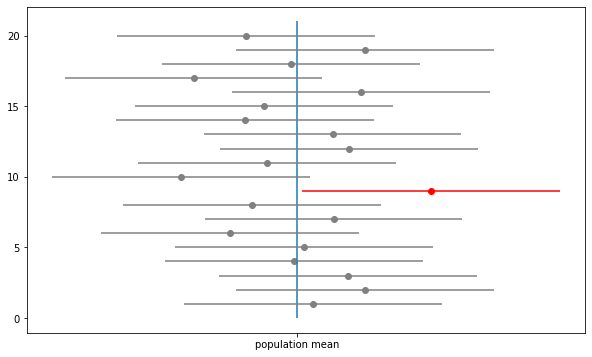

In [26]:
# 신뢰구간 추정 20번 수행 시 몇번 모평균이 포함되어있는지 확인

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

# 표준정규분포 N(0,1)
rv = stats.norm()
n_samples = 20

# 모평균 0~20까지 표시
ax.vlines(p_mean, 0, 21)

for i in range(n_samples):
    sample_ = samples[i]
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025)*np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975)*np.sqrt(p_var/n)
    
    # 모평균이 구간안에 있을 때
    if lcl <= p_mean <= ucl :
        # 점 위치 x축(표본평균), y축
        ax.scatter(s_mean_, n_samples-i, color = 'gray')
        # y축, x축 범위
        ax.hlines(n_samples-i, lcl, ucl, color = 'gray')
    else:
        ax.scatter(s_mean_, n_samples-i, color = 'red')
        ax.hlines(n_samples-i, lcl, ucl, color = 'red')
ax.set_xticks([p_mean])
ax.set_xticklabels(['population mean'])
plt.show()

=> 20번중 1번 모평균을 포함하지 않는 구간추정 출력

In [15]:
# 신뢰구간 1만번 계산, 모평균이 포함된 것은 몇 %인지 시뮬레이션 
rv = stats.norm()
cnt = 0
# 표본크기가 20개인 데이터 1만개 추출
np.random.seed(1111)
n = 20
n_samples = 10000
samples = np.random.choice(scores, (n_samples, n))

for sample_ in samples:
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025)*np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975)*np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        cnt +=1
cnt/len(samples)

0.951

- 정규분포의 모분산 구간추정
  - 카이제곱분포 / 불편분산 사용

In [16]:
# 1만 개의 표본 데이터에서 Y의 표본 데이터를 생성

# 표본크기가 20개인 데이터 1만개 추출
np.random.seed(1111)
n = 20
n_samples = 10000
samples = np.random.choice(scores, (n_samples, n))

# 표본평균의 평균
sample_means = np.mean(samples, axis=1)

# 표본평균의 불편분산
sample_u_vars = np.var(samples, axis = 1, ddof = 1)

# Y의 표본 데이터
sample_y = sample_u_vars*(n-1)/p_var
sample_y

array([11.275, 15.728, 18.057, ..., 19.386,  9.242, 18.578])

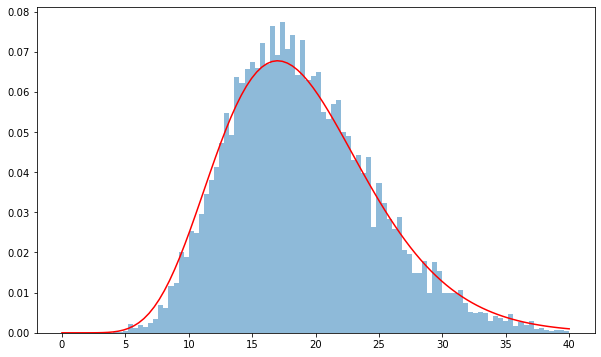

In [29]:
# Y의 표본데이터 히스토그램, X^2(n-1)의 밀도함수 출력
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 40, 100)
rv = stats.chi2(n-1)
ax.plot(xs, rv.pdf(xs), color = 'red')
ax.hist(sample_y, bins = 100, range = (0, 40), density = True, alpha = 0.5)
plt.show()

=> X^2(n-1)와 대략 일치

In [30]:
#  20개 표본 데이터 사용 => 95% 신뢰구간 출력

# 20개 뽑은 표본 데이터의 불편분산
u_var = np.var(sample, ddof = 1)

rv = stats.chi2(n-1)
lcl = (n-1)*u_var / rv.isf(0.025)
ucl = (n-1)*u_var / rv.isf(0.975)
lcl, ucl

(91.525, 337.596)

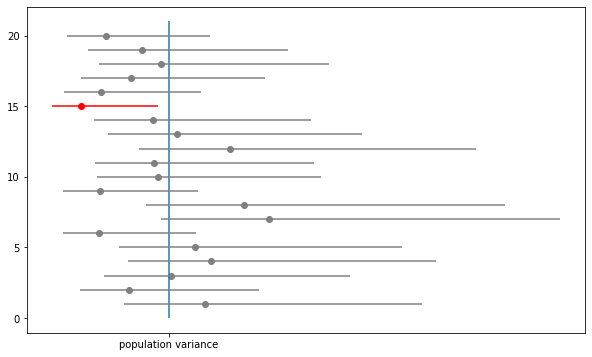

In [51]:
# 신뢰구간 추정 20번 시행

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

rv = stats.chi2(n-1)
n_samples = 20
ax.vlines(p_var, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    u_var_ = np.var(sample_, ddof = 1)
    lcl = (n-1)*u_var_ / rv.isf(0.025)
    ucl = (n-1)*u_var_ / rv.isf(0.975)
    
    if lcl <= p_var <= ucl:
        ax.scatter(u_var_, n_samples-i, color = 'gray')
        ax.hlines(n_samples-i, lcl, ucl, 'gray')
    else:
        ax.scatter(u_var_, n_samples-i, color = 'red')
        ax.hlines(n_samples-i, lcl, ucl, 'red')
ax.set_xticks([p_var])
ax.set_xticklabels(['population variance'])
plt.show()

In [31]:
# 신뢰구간을 1만번 계산하여 신뢰구간에 모분산이 포함된 것이 몇% 인지 시뮬레이션
rv = stats.chi2(n-1)
cnt = 0
for sample_ in samples:
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1)*u_var_ / rv.isf(0.025)
    ucl = (n-1)*u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        cnt +=1
cnt / len(samples)

0.964

### 2-2) 모분산을 모르는 경우 모평균 추정
- 불편분산 사용, t(n-1)인 t분포 사용

In [35]:
# 20개의 표본으로 구간 추정 (신뢰도 95%)

np.random.seed(0)
n = 20
sample = np.random.choice(scores, n)
# 표본평균
s_mean = np.mean(sample)
# 불편분산
u_var = np.var(sample, ddof = 1)

rv = stats.t(n-1)
lcl = s_mean - rv.isf(0.025)*np.sqrt(u_var/n)
ucl = s_mean - rv.isf(0.975)*np.sqrt(u_var/n)

#모평균
print('모평균', p_mean)
lcl, ucl

모평균 69.53


(64.512, 76.288)

=> 구간 내에 포함

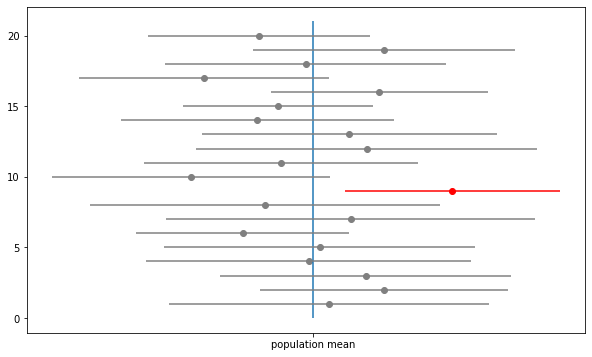

In [37]:
# 신뢰구간 계산 20번 실행

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

rv = stats.t(n-1)
n_samples = 20
ax.vlines(p_mean, 0, 21)
for i in range(n_samples):
    s_mean = np.mean(samples[i])
    s_var = np.var(samples[i], ddof = 1)
    lcl = s_mean - rv.isf(0.025)*np.sqrt(s_var/n)
    ucl = s_mean - rv.isf(0.975)*np.sqrt(s_var/n)
    if lcl<= p_mean <= ucl:
        ax.scatter(s_mean, n_samples-i, color = 'gray')
        ax.hlines(n_samples-i, lcl, ucl, color = 'gray')
        
    else:
        ax.scatter(s_mean, n_samples-i, color='red')
        ax.hlines(n_samples-i, lcl, ucl, color='red')
ax.set_xticks([p_mean])
ax.set_xticklabels(['population mean'])
plt.show()

### 2-3) 정규분포 외의 모평균 구간추정

- 베르누이 분포
  - Bern(p)의 기댓값이 p가 되는 사실로부터 모집단의 비율 p는 모평균의 추정과 같은 구조라 추정 (모비율의 추정)

In [39]:
# 1000명의 응답 (1 or 0으로 대답)

enquete_df = pd.read_csv('data/ch10_enquete.csv')
enquete = np.array(enquete_df['known'])
n = len(enquete)
enquete[:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [42]:
# Bern(p)의 기댓값(p), 분산 (p(1-p)/n)

# 표본평균 1000명으로 국민전체(모집단)의 인지도 확인
s_mean = enquete.mean()
s_mean

0.709

=> 상품의 인지도 79%

In [43]:
# 중심극한정리에 따라 표본평균 x는 N(p, p(1-p)/n)을 따름 (표준화 후 신뢰구간 설정)
n = len(enquete)
# 표준정규분포
rv = stats.norm()
lcl = s_mean - rv.isf(0.025)*np.sqrt(s_mean*(1-s_mean)/n)
ucl = s_mean - rv.isf(0.975)*np.sqrt(s_mean*(1-s_mean)/n)
lcl, ucl

(0.681, 0.737)

=> 해당 제품의 인지도 p의 95% 신뢰구간

- 포아송 분포
  - 포아송분포를 따르는 모집단의 모평균 신뢰구간(ex. 사이트 평균 액세스 수)

In [45]:
# 어떤 사이트에 대한 액세스 수 1 시간당 액세스 수 (총 72시간 분량)
n_access_df = pd.read_csv('data/ch10_access.csv')
n_access = np.array(n_access_df['access number'])
n = len(n_access)
n_access[:10]

array([10, 11,  9,  9, 18, 13,  4, 10, 10,  8], dtype=int64)

In [46]:
# 1시간당 평균 액세스 수 => Poi(a)를 따름(표본평균 x의 기댓값: a, 분산: a/n)

# 표본평균
s_mean = n_access.mean()
s_mean

10.444

=> 1시간당 평균 액세스 수 10.444건이라 추정

In [47]:
# 중심극한정리에 의해 포아송분포가 따르는 표본평균도 N(a, a/n)을 따름 => 표준화 후 신뢰구간 측정

rv = stats.norm()
lcl = s_mean - rv.isf(0.025)*np.sqrt(s_mean/n)
ucl = s_mean - rv.isf(0.975)*np.sqrt(s_mean/n)

lcl, ucl

(9.698, 11.191)

=> 해당 사이트의 평균 액세스 수의 95% 신뢰구간

#### 과제 0905_2
- 다음 용어를 예를들어 설명하세요.
    불편성, 일치성, 불편분산<br>
- 카이제곱분포, t분포가 구간 추정에 활용된 사례를 만들기

In [ ]:
# 불편성, 일치성, 불편분산 설명

불편성 : 추정량의 기댓값이 추측하려는 모수가 되는 성질 (추정량의 기댓값 - 모수 = 0)

<img src = 'data/불편성.jpeg' STYLE='width 100px;'>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


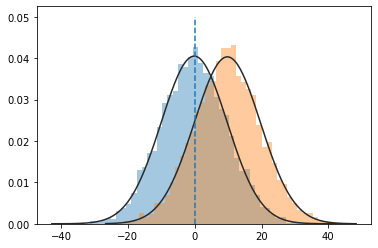

In [51]:
# 예시

import seaborn as sns
# 정규분포를 이루는 데이터 조건 형성
# 데이터 개수 5000개, 분산, 평균 설정
N1, N2 = 5000, 5000
sigma_1, sigma_2 = 10, 10
real, mu_1, mu_2 = 0, 0, 10

# 랜덤데이터 형성(정규분포)
np.random.seed(0)
x1 = stats.norm(mu_1, sigma_1).rvs(N1)
x2 = stats.norm(mu_2, sigma_2).rvs(N2)

# 출력
sns.distplot(x1, kde = False, fit = stats.norm, label = 'f1')
sns.distplot(x2, kde = False, fit = stats.norm, label = 'f2')
plt.vlines(x = real, ymin = 0, ymax = 0.05, linestyles = 'dashed', label = '모수')
plt.show()

=> f1의 기댓값은 모수와 같음(불편성)

일치성 : 표본 크기 n이 커지면 추측하기 원하는 모수에 수렴해지는 성질

In [79]:
# 정규분포를 이루는 모집단에서 표본크기가 10, 400, 800개인 표본 출력

# 모집단
rv = stats.norm()
mo_n = 100000
rv_mo = rv.rvs(mo_n)
rv_mo.mean() # 모집단의 평균

0.001

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


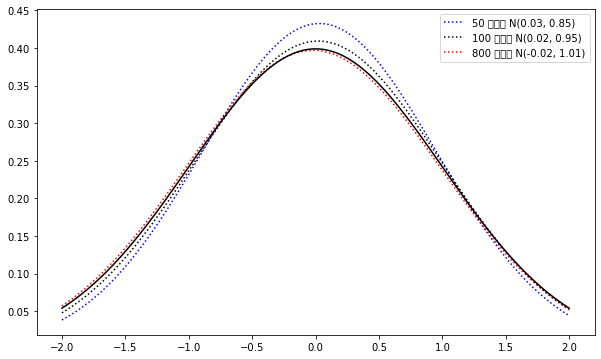

In [81]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

colors = ['blue', 'black', 'red']
# 모집단에서 50, 100, 800개 랜덤 추출

xs = np.linspace(-2, 2, 100)
for i, color in zip([50, 100, 800], colors):
    np.random.seed(0)
    s = np.random.choice(rv_mo, i)
    s_mean = round(np.mean(s), 2)
    s_var = round(np.var(s), 2)
    s_rv = stats.norm(s_mean, np.sqrt(s_var))
    ax.plot(xs, s_rv.pdf(xs), ls = ':', color = color, label = f'{i} 표본의 N({s_mean}, {s_var})')
ax.plot(xs, rv.pdf(xs), ls = '-', color = 'black')
ax.legend()
plt.show()

=> 표본이 커질수록 모집단의 그래프와 비슷해짐

불편분산 : 표본분산 / (n-1)

In [86]:
# 모집단 (1000명)
mo = np.random.choice(100, 1000)
mo.mean(), mo.var() 

(48.484, 815.100)

=> 모평균, 모분산

In [127]:
# 100명 10번 추출
np.random.seed(0)
st = np.random.choice(mo, (10, 100))

# 표본평균, 표본분산, 불편분산
for i in range(10):
    s_mean = np.mean(st[i])
    s_var = np.var(st[i])
    s_dvar = np.var(st[i], ddof = 1)
    
    print(f'{i+1}번째 평균: {s_mean}, 분산: {s_var: 3f}, 불편분산: {s_dvar: 3f}')

1번째 평균: 44.5, 분산:  771.790000, 불편분산:  779.585859
2번째 평균: 46.02, 분산:  744.199600, 불편분산:  751.716768
3번째 평균: 52.25, 분산:  831.647500, 불편분산:  840.047980
4번째 평균: 50.8, 분산:  769.580000, 불편분산:  777.353535
5번째 평균: 49.21, 분산:  650.145900, 불편분산:  656.713030
6번째 평균: 43.9, 분산:  814.230000, 불편분산:  822.454545
7번째 평균: 49.57, 분산:  652.885100, 불편분산:  659.479899
8번째 평균: 51.14, 분산:  924.220400, 불편분산:  933.555960
9번째 평균: 47.35, 분산:  808.487500, 불편분산:  816.654040
10번째 평균: 46.54, 분산:  961.808400, 불편분산:  971.523636


In [131]:
# 불편분산이 모분산과 더 가까운 경우의 수 출력

# 100명 10번 추출
np.random.seed(0)
n = 10
st = np.random.choice(mo, (n, 100))

# 모분산
mo_var = mo.var()
count = 0

for i in range(n):
    s_var = np.var(st[i])
    s_dvar = np.var(st[i], ddof = 1)
    
    # 모분산과의 차이
    t1 = abs(s_var - mo_var)
    t2 = abs(s_dvar - mo_var)
    
    if t1 > t2:
        count+=1
    else:
        pass
count/n

0.600

In [132]:
# 카이제곱분포, t분포가 구간 추정에 활용된 사례를 만들기

In [ ]:
# 카이제곱분포 : 표준정규분포에 의해 정의됨
# t분포 : 서로 독립인 표준정규분포와 카이제곱분포에의해 정의됨

In [139]:
# 모집단이 정규분포를 따르는 분포

# 50명씩 10반으로 구성된 고등학교에서 1반을 뽑아 전체 학생의 키 평균을 추정하면?
# 모평균 N(170, 30) 따른다는 가정

mo = stats.norm(170, np.sqrt(30))
students = 500
mo_rv = mo.rvs(students)
# 모평균, 분산
mo_rv.mean(), mo_rv.var()

(169.861, 29.890)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


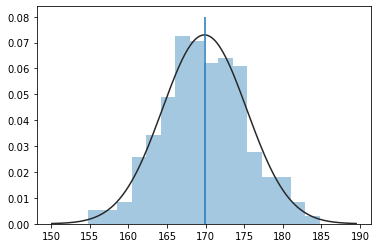

In [145]:
# 모집단의 분포
sns.distplot(mo_rv, kde = False, fit = stats.norm, label = '모집단')
plt.vlines(x = mo_rv.mean(), ymin = 0, ymax = 0.08)
plt.show()

In [140]:
np.random.seed(0)
# 50명씩 10반으로 구성
classes = np.random.choice(mo_rv, (10, 50))
classes

array([[174.693, 174.258, 169.151, 169.785, 165.12 , 166.846, 169.06 ,
        173.398, 172.249, 171.737, 169.364, 169.272, 182.619, 169.015,
        173.993, 168.49 , 164.135, 174.699, 167.892, 163.602, 178.289,
        168.344, 169.015, 164.335, 164.135, 172.47 , 174.625, 162.034,
        163.516, 176.241, 171.034, 160.313, 174.395, 167.246, 168.369,
        174.511, 173.321, 162.239, 165.713, 166.254, 172.202, 168.49 ,
        166.223, 168.369, 173.335, 176.118, 176.118, 178.033, 170.678,
        173.778],
       [169.395, 171.034, 161.225, 180.129, 165.137, 172.071, 176.023,
        168.307, 179.384, 170.48 , 169.723, 171.536, 157.822, 178.395,
        166.56 , 173.682, 173.682, 175.091, 163.533, 170.9  , 167.879,
        169.75 , 168.307, 172.137, 173.321, 179.027, 180.646, 160.654,
        169.529, 172.071, 173.524, 162.423, 165.547, 173.03 , 170.515,
        171.657, 167.365, 167.373, 175.051, 170.484, 167.443, 172.551,
        176.696, 170.212, 178.033, 172.202, 163.533, 174.69

In [148]:
# 모평균을 모를때, 1반을 임의추출해 그 반의 분산으로 전체 학생의 분산 추정

# 4번째 반을 표본집단으로 구성
sample = classes[3]

# 표본평균, 불편분산
s_mean = np.mean(sample, axis=0)
s_var = np.var(sample, axis=0, ddof = 0)

# n-1을 따르는 카이제곱분포
rv = stats.chi2(n-1)

# 모분산의 신뢰구간, 신뢰도 90%
lcl = (n-1)*s_var/rv.isf(0.05)
ucl = (n-1)*s_var/rv.isf(0.95)

# 모분산
p_var = mo.var()

print('모분산', p_var)
print('모분산의 신뢰구간', [lcl, ucl])

모분산 30.0
모분산의 신뢰구간 [17.223335176761083, 87.63649111641197]


In [150]:
# 모분산을 모를때 모평균의 구간 추정-> t분포 사용

rv = stats.t(n-1)
lcl = s_mean - rv.isf(0.05)*np.sqrt(s_var/n)
ucl = s_mean - rv.isf(0.95)*np.sqrt(s_var/n)

# 모평균
p_mean = mo_rv.mean()

print('모평균', p_mean)
print('모평균의 신뢰구간', [lcl, ucl])

모평균 169.8611280164473
모평균의 신뢰구간 [166.09657566351498, 172.69353256428505]
